In [60]:
import os
import pygame
import pandas as pd

from PIL import Image
from env.pok_env_gym_RLLib import PokemonEnv

In [74]:
from pygame.locals import QUIT, KEYDOWN, K_UP, K_DOWN, K_LEFT, K_RIGHT, K_a, K_b, K_q 

# Function to map keyboard inputs to actions
def get_action():
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        elif event.type == KEYDOWN:
            if event.key == K_UP:
                return 0  
            elif event.key == K_DOWN:
                return 1  
            elif event.key == K_LEFT:
                return 2  
            elif event.key == K_RIGHT:
                return 3 
            elif event.key == K_a:
                return 4  
            elif event.key == K_b:
                return 5  
    return 6  

from tqdm.notebook import tqdm

data_coords = pd.DataFrame(columns=['m', 'x', 'y'])

def play_game():
    pygame.init()
    
    env = PokemonEnv()

    env.reset()
    
    for _ in tqdm(range(500)):
        
        action = get_action()
        
        env.step(action)

    return env.data_info

data_info = play_game()

  0%|          | 0/500 [00:00<?, ?it/s]

In [75]:
print(data_info.m.unique())

[40  0 12  1 41 43 42 44 13 50 51]


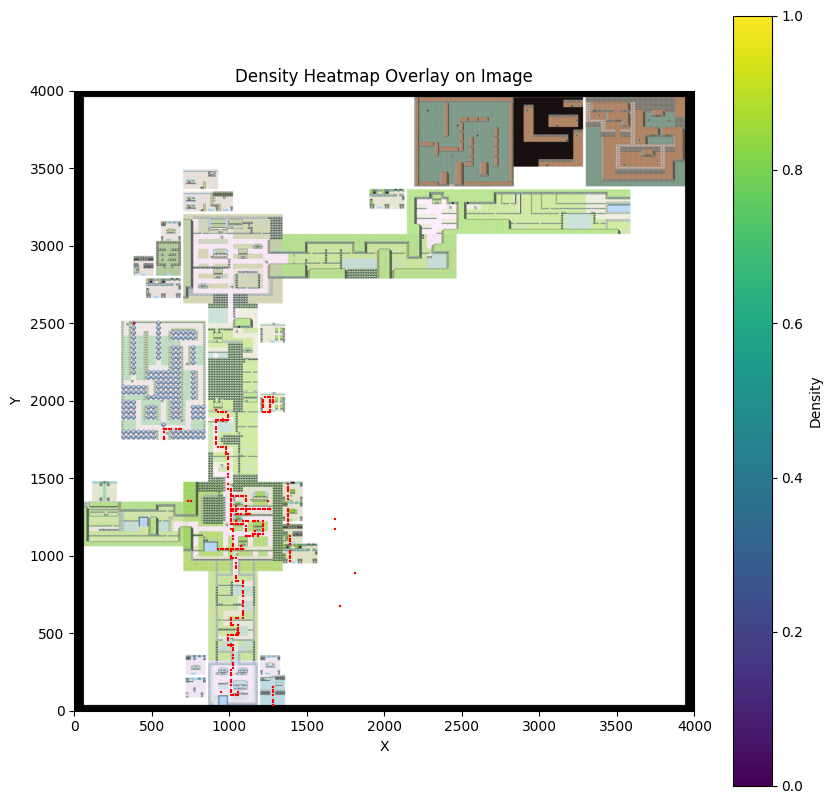

In [102]:
import numpy as np
import matplotlib.pyplot as plt

from visualize_heatmap import blend_overlay, make_all_coords_arrays

def game_coord_to_pixel_coord(
    x, y, map_idx, base_y):
    
    global_offset = np.array([1056-16*12, 331]) #np.array([790, -29])
    map_offsets = {
        0: np.array([0,211]), # pallet town
        1: np.array([-10, 138]), # viridian
        2: np.array([-10, 180]), # pewter
        12: np.array([0, 175]), # route 1
        13: np.array([0, 64]), # route 2
        14: np.array([30, 172]), # Route 3
        15: np.array([80, 190]), #Route 4
        33: np.array([-50, 145]), # route 22
        37: np.array([-9, 216]), # red house first
        38: np.array([-9, 25-32]), # red house second
        39: np.array([9+12, 207]), # blues house
        40: np.array([25-4, 217]), # oaks lab
        41: np.array([30, 162]), # Pokémon Center (Viridian City)
        42: np.array([30, 155]), # Poké Mart (Viridian City)
        43: np.array([30, 137]), # School (Viridian City)
        44: np.array([30, 147]), # House 1 (Viridian City)
        47: np.array([21,136]), # Gate (Viridian City/Pewter City) (Route 2)
        49: np.array([21,108]), # Gate (Route 2)
        50: np.array([21,102]), # Gate (Route 2/Viridian Forest) (Route 2)
        51: np.array([-35, 73]), # viridian forest
        52: np.array([-10, 189]), # Pewter Museum (floor 1)
        53: np.array([-10, 198]), # Pewter Museum (floor 2)
        54: np.array([-21, 169]), #Pokémon Gym (Pewter City)
        55: np.array([-19, 177]), #House with disobedient Nidoran♂ (Pewter City)
        56: np.array([-30, 163]), #Poké Mart (Pewter City)
        57: np.array([-19, 177]), #House with two Trainers (Pewter City)
        58: np.array([-25, 154]), # Pokémon Center (Pewter City)
        59: np.array([83, 227]), # Mt. Moon (Route 3 entrance)
        60: np.array([123, 227]), # Mt. Moon
        61: np.array([152, 227]), # Mt. Moon
        68: np.array([65, 190]), # Pokémon Center (Route 4)
        193: None # Badges check gate (Route 22)
    }
    if map_idx in map_offsets.keys():
        offset = map_offsets[map_idx]
    else:
        offset = np.array([0,0])
        x, y = 0, 0
    coord = global_offset + 16*(offset + np.array([x,y]))
    coord[1] = base_y - coord[1]
    return coord

base_coords = make_all_coords_arrays(data_info)

main_map = np.array(Image.open('pokemap_full.png'))
start_bg = main_map.copy()
overlay = np.zeros_like(start_bg, dtype=np.uint8)

pixel_coords = np.zeros((base_coords.shape[0], 2))

for i, row in enumerate(base_coords):
    x, y, m = row
    x_img, y_img = game_coord_to_pixel_coord(x, y, m, overlay.shape[1])
    pixel_coords[i,:] = np.array([x_img, y_img]).astype(int)

img_width = 4000
img_height = 4000

plt.figure(figsize=(10, 10))  
plt.imshow(blend_overlay(start_bg, overlay), cmap='gray', extent=[0, img_width, 0, img_height])

# Plot the density of points as a heatmap
plt.scatter(pixel_coords[:,0], pixel_coords[:, 1], s=1, color="red", marker="+")
plt.colorbar(label='Density')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap Overlay on Image')

plt.xlim(0, img_width)  
plt.ylim(0, img_height)  

plt.show()

# 1. Jouer à la main et récupérer coordonnées à la main

In [61]:
from pygame.locals import QUIT, KEYDOWN, K_UP, K_DOWN, K_LEFT, K_RIGHT, K_a, K_b, K_q 

# Function to map keyboard inputs to actions
def get_action():
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        elif event.type == KEYDOWN:
            if event.key == K_UP:
                return 0  
            elif event.key == K_DOWN:
                return 1  
            elif event.key == K_LEFT:
                return 2  
            elif event.key == K_RIGHT:
                return 3 
            elif event.key == K_a:
                return 4  
            elif event.key == K_b:
                return 5  
    return 6  

In [62]:
from tqdm.notebook import tqdm

screenshot_dir = "screenshots"
if not os.path.exists(screenshot_dir):
    os.makedirs(screenshot_dir)

def play_game():
    pygame.init()
    
    env = PokemonEnv()

    env.reset()
    
    for _ in tqdm(range(5000)):
        
        action = get_action()
        
        env.step(action)

    return env.data_info

In [63]:
data_info = play_game()

  0%|          | 0/5000 [00:00<?, ?it/s]

2024-03-27 10:23:56.655 Python[61926:6514901] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


KeyboardInterrupt: 

: 

In [5]:
data_info.to_csv("data_test.csv")

# 2. Créer heatmaps de données

In [46]:
import subprocess

runs_dir = "runs/"

for file in os.listdir(os.path.join(runs_dir, "data")): 
    if "dqn_gan" in file:
        command = ["python3", "visualize_heatmap.py", "--datapath", os.path.join(runs_dir, "data", file), "--output_name", os.path.join(runs_dir, "heatmaps", file.replace("csv", "png"))]
        string_command = " ".join(command)
        print(f"Running command : {string_command}")
        subprocess.run(command)

Running command : python3 visualize_heatmap.py --datapath runs/data/data_dqn_gan_39.csv --output_name runs/heatmaps/data_dqn_gan_39.png
Running command : python3 visualize_heatmap.py --datapath runs/data/data_dqn_gan_11.csv --output_name runs/heatmaps/data_dqn_gan_11.png
Running command : python3 visualize_heatmap.py --datapath runs/data/data_dqn_gan_9.csv --output_name runs/heatmaps/data_dqn_gan_9.png
Running command : python3 visualize_heatmap.py --datapath runs/data/data_dqn_gan_8.csv --output_name runs/heatmaps/data_dqn_gan_8.png
Running command : python3 visualize_heatmap.py --datapath runs/data/data_dqn_gan_10.csv --output_name runs/heatmaps/data_dqn_gan_10.png
Running command : python3 visualize_heatmap.py --datapath runs/data/data_dqn_gan_38.csv --output_name runs/heatmaps/data_dqn_gan_38.png
Running command : python3 visualize_heatmap.py --datapath runs/data/data_dqn_gan_12.csv --output_name runs/heatmaps/data_dqn_gan_12.png
Running command : python3 visualize_heatmap.py --dat

In [11]:
import subprocess

runs_dir = "runs/"

for file in os.listdir(runs_dir): 
    if "png" in file: 
        command = ["mv", os.path.join(runs_dir, file), os.path.join(runs_dir, "heatmaps", file)]
        subprocess.run(command)
    if "csv" in file: 
        command = ["mv", os.path.join(runs_dir, file), os.path.join(runs_dir, "data", file)]
        subprocess.run(command)

In [ ]:
runs_dir = "runs/"

for file in os.listdir(runs_dir): 
    if "random" in file: 
        new_file = file.replace(".csv","")
        print(new_file)
        df_data = pd.read_csv(os.path.join(runs_dir, file))
        #df_data[:16000].to_csv(os.path.join(runs_dir, f"{new_file}_reduced.csv"))

In [7]:
runs_dir = "runs/"

for file in os.listdir(runs_dir): 
    if "random" in file: 
        new_file = file.replace(".csv","")
        df_data = pd.read_csv(os.path.join(runs_dir, file))
        df_data[:16000].to_csv(os.path.join(runs_dir, f"{new_file}_reduced.csv"))

In [41]:
import os
import pandas as pd

folder_path = "data_agents_DQN_GAN/"
runs_dir = "runs/"

dict_data = {}
previous_num_step = 0
counter = 0

for i, filename in enumerate(sorted(os.listdir(folder_path))):
    num_steps = filename.split("_")[3].replace("steps.csv", "")

    if i==0: 
        df = pd.read_csv(os.path.join(folder_path, filename))
    elif num_steps > previous_num_step: 
        df = pd.concat([df, pd.read_csv(os.path.join(folder_path, filename))], ignore_index=False)
    else: 
        df.to_csv(os.path.join(runs_dir, "data", f"data_dqn_gan_{counter}.csv"), index=True)
        df = pd.read_csv(os.path.join(folder_path, filename))
        counter += 1
    previous_num_step = num_steps


# 3. Création graphique pour performances

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 

runs_dir_data = "runs/data/"

dfs_random = [pd.read_csv(os.path.join(runs_dir_data, file)) for file in os.listdir(runs_dir_data) if "reduced" in file]

level_random = [df['levels'] for df in dfs_random]
mean_level_random = pd.concat(level_random).groupby(level=0).mean()
std_level_random = pd.concat(level_random).groupby(level=0).std()

curhp_random = [df['current_hp'] for df in dfs_random]
mean_curhp_random = pd.concat(curhp_random).groupby(level=0).mean()
std_curhp_random = pd.concat(curhp_random).groupby(level=0).std()



dfs_dqn = [pd.read_csv(os.path.join(runs_dir_data, file)) for file in os.listdir(runs_dir_data) if "dqn" in file]

level_dqn = [df['levels'] for df in dfs_dqn]
mean_level_dqn = pd.concat(level_dqn).groupby(level=0).mean()
std_level_dqn = pd.concat(level_dqn).groupby(level=0).std()

curhp_dqn = [df['current_hp'] for df in dfs_dqn]
mean_curhp_dqn = pd.concat(curhp_dqn).groupby(level=0).mean()
std_curhp_dqn = pd.concat(curhp_dqn).groupby(level=0).std()



dfs_dqn_gan = [pd.read_csv(os.path.join(runs_dir_data, file)) for file in os.listdir(runs_dir_data) if "dqn_gan" in file]

level_dqn_gan = [df['levels'] for df in dfs_dqn_gan]
mean_level_dqn_gan = pd.concat(level_dqn_gan).groupby(level=0).mean()
std_level_dqn_gan = pd.concat(level_dqn_gan).groupby(level=0).std()

curhp_dqn_gan = [df['current_hp'] for df in dfs_dqn_gan]
mean_curhp_dqn_gan = pd.concat(curhp_dqn_gan).groupby(level=0).mean()
std_curhp_dqn_gan = pd.concat(curhp_dqn_gan).groupby(level=0).std()

In [26]:
import subprocess

screenshots_dir = "gan/screenshots/"

def extract_number(filename:str):
    parts = filename.split(".")[0].split("_")
    for part in parts:
        if part.isdigit():
            return int(part)
    return None

list_number_used = []
for file in os.listdir(screenshots_dir): 
    if "test_" in file: 
        command_test = ["cp", os.path.join(screenshots_dir, file), os.path.join(screenshots_dir, "test", file)]
        subprocess.run(command_test)
        number = extract_number(file)
        list_number_used.append(number)
        file_train = f"frame_train_{number}.png"
        command_train = ["cp", os.path.join(screenshots_dir, file_train), os.path.join(screenshots_dir, "test", file_train)]
        subprocess.run(command_train)
    if "train_" in file: 
        number = extract_number(file)
        if not number in list_number_used: 
            command_train = ["cp", os.path.join(screenshots_dir, file), os.path.join(screenshots_dir, "train", file)]
            subprocess.run(command_train)

In [27]:
for file in os.listdir(screenshots_dir):
    if file.endswith(".png"): 
        command = ['rm', os.path.join(screenshots_dir, file)]
        subprocess.run(command)

In [5]:
import random
import subprocess

screenshots_dir_train = os.path.join(screenshots_dir, "train")

for file in os.listdir(screenshots_dir_train):
    if file.endswith('.png'):
        if random.random() < 0.15:
            command_val = ["cp", os.path.join(screenshots_dir_train, file), os.path.join(screenshots_dir_train, "val", file)] 
            subprocess.run(command_val)
        else: 
            command_train = ["cp", os.path.join(screenshots_dir_train, file), os.path.join(screenshots_dir_train, "train", file)] 
            subprocess.run(command_train)

In [6]:
for file in os.listdir(screenshots_dir_train):
    if file.endswith(".png"): 
        command = ['rm', os.path.join(screenshots_dir_train, file)]
        subprocess.run(command)

In [3]:
def make_all_coords_arrays(df):
    return np.array(df[['x', 'y', 'm']].to_numpy().astype(np.uint8))

def game_coord_to_pixel_coord(
    x, y, map_idx, base_y):
    
    global_offset = np.array([1056-16*12, 331]) #np.array([790, -29])
    map_offsets = {
        0: np.array([0,0]), # pallet town
        1: np.array([-10, 72]), # viridian
        2: np.array([-10, 180]), # pewter
        12: np.array([0, 36]), # route 1
        13: np.array([0, 144]), # route 2
        14: np.array([30, 172]), # Route 3
        15: np.array([80, 190]), #Route 4
        33: np.array([-50, 64]), # route 22
        37: np.array([-9, 2]), # red house first
        38: np.array([-9, 25-32]), # red house second
        39: np.array([9+12, 2]), # blues house
        40: np.array([25-4, -6]), # oaks lab
        41: np.array([30, 47]), # Pokémon Center (Viridian City)
        42: np.array([30, 55]), # Poké Mart (Viridian City)
        43: np.array([30, 72]), # School (Viridian City)
        44: np.array([30, 64]), # House 1 (Viridian City)
        47: np.array([21,136]), # Gate (Viridian City/Pewter City) (Route 2)
        49: np.array([21,108]), # Gate (Route 2)
        50: np.array([21,108]), # Gate (Route 2/Viridian Forest) (Route 2)
        51: np.array([-35, 137]), # viridian forest
        52: np.array([-10, 189]), # Pewter Museum (floor 1)
        53: np.array([-10, 198]), # Pewter Museum (floor 2)
        54: np.array([-21, 169]), #Pokémon Gym (Pewter City)
        55: np.array([-19, 177]), #House with disobedient Nidoran♂ (Pewter City)
        56: np.array([-30, 163]), #Poké Mart (Pewter City)
        57: np.array([-19, 177]), #House with two Trainers (Pewter City)
        58: np.array([-25, 154]), # Pokémon Center (Pewter City)
        59: np.array([83, 227]), # Mt. Moon (Route 3 entrance)
        60: np.array([123, 227]), # Mt. Moon
        61: np.array([152, 227]), # Mt. Moon
        68: np.array([65, 190]), # Pokémon Center (Route 4)
        193: None # Badges check gate (Route 22)
    }
    if map_idx in map_offsets.keys():
        offset = map_offsets[map_idx]
    else:
        offset = np.array([0,0])
        x, y = 0, 0
    coord = global_offset + 16*(offset + np.array([x,y]))
    coord[1] = base_y - coord[1]
    return coord

def blend_overlay(background, over):
    al = over[...,3].reshape(over.shape[0], over.shape[1], 1)
    ba = (255-al)/255
    oa = al/255
    return (background[..., :3]*ba + over[..., :3]*oa).astype(np.uint8)

In [4]:
base_coords = make_all_coords_arrays(df_data)

main_map = np.array(Image.open('pokemap_full_bw.png'))
start_bg = main_map.copy()
overlay = np.zeros_like(start_bg, dtype=np.uint8)

In [9]:
pixel_coords = np.zeros((base_coords.shape[0], 2))

for i, row in enumerate(base_coords):
    x, y, m = row
    x_img, y_img = game_coord_to_pixel_coord(x, y, m, overlay.shape[1])
    pixel_coords[i,:] = np.array([x_img, y_img]).astype(int)

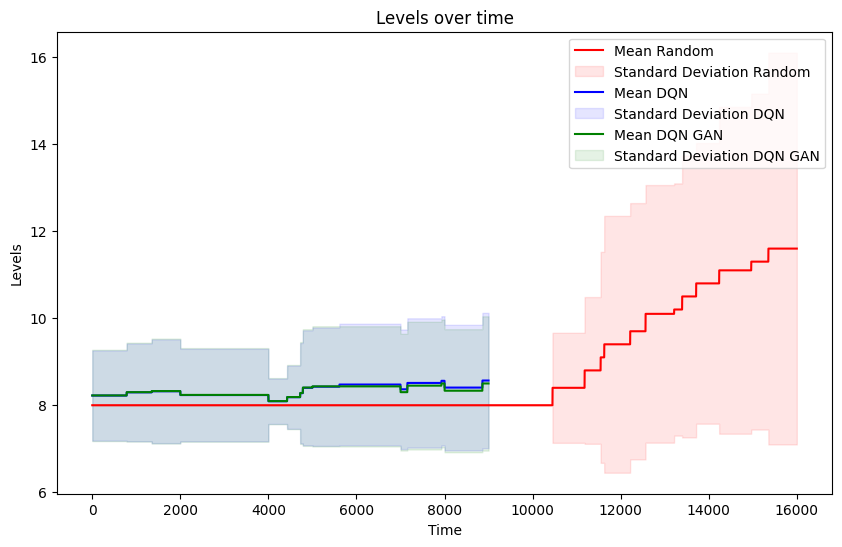

In [10]:
# Plot the data along with mean and standard deviation
plt.figure(figsize=(10, 6))

plt.plot(mean_level_random.index, mean_level_random.values, color='red', label='Mean Random') 
plt.fill_between(mean_level_random.index, mean_level_random.values - std_level_random.values, mean_level_random.values + std_level_random.values, color='red', alpha=0.1, label='Standard Deviation Random') 

plt.plot(mean_level_dqn.index, mean_level_dqn.values, color='blue', label='Mean DQN') 
plt.fill_between(mean_level_dqn.index, mean_level_dqn.values - std_level_dqn.values, mean_level_dqn.values + std_level_dqn.values, color='blue', alpha=0.1, label='Standard Deviation DQN') 

plt.plot(mean_level_dqn_gan.index, mean_level_dqn_gan.values, color='green', label='Mean DQN GAN') 
plt.fill_between(mean_level_dqn_gan.index, mean_level_dqn_gan.values - std_level_dqn_gan.values, mean_level_dqn_gan.values + std_level_dqn_gan.values, color='green', alpha=0.1, label='Standard Deviation DQN GAN') 

plt.xlabel('Time')
plt.ylabel('Levels')
plt.title('Levels over time')
plt.legend()
plt.show()

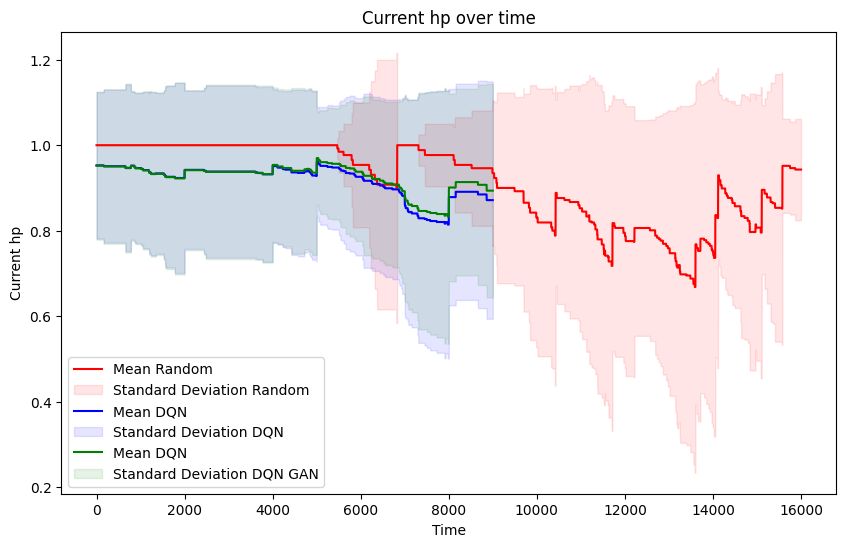

In [57]:
# Plot the data along with mean and standard deviation
plt.figure(figsize=(10, 6))

plt.plot(mean_curhp_random.index, mean_curhp_random.values, color='red', label='Mean Random') 
plt.fill_between(mean_curhp_random.index, mean_curhp_random.values - std_curhp_random.values, mean_curhp_random.values + std_curhp_random.values, color='red', alpha=0.1, label='Standard Deviation Random') 

plt.plot(mean_curhp_dqn.index, mean_curhp_dqn.values, color='blue', label='Mean DQN') 
plt.fill_between(mean_curhp_dqn.index, mean_curhp_dqn.values - std_curhp_dqn.values, mean_curhp_dqn.values + std_curhp_dqn.values, color='blue', alpha=0.1, label='Standard Deviation DQN') 

plt.plot(mean_curhp_dqn_gan.index, mean_curhp_dqn_gan.values, color='green', label='Mean DQN') 
plt.fill_between(mean_curhp_dqn_gan.index, mean_curhp_dqn_gan.values - std_curhp_dqn_gan.values, mean_curhp_dqn_gan.values + std_curhp_dqn_gan.values, color='green', alpha=0.1, label='Standard Deviation DQN GAN') 

plt.xlabel('Time')
plt.ylabel('Current hp')
plt.title('Current hp over time')
plt.legend()
plt.show()